(768, 9)
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

Shapes: (614, 7) (154, 7) (614,) (154,)

Confusion Matrix:
 [[88 12]
 [19 35]]
Accuracy Score: 0.7987012987012987
Accuracy in Percentage: 79 %


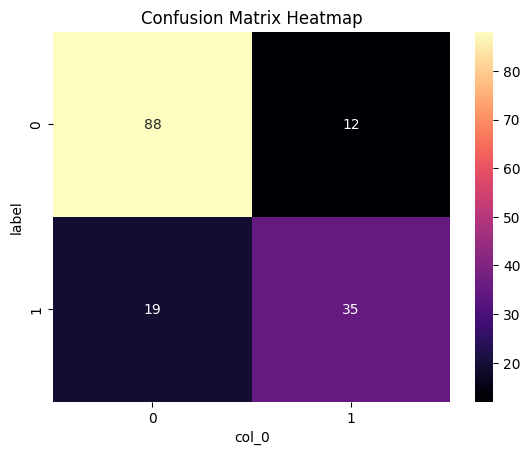

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Column names
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

# Load dataset from public URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url, names=col_names, header=None)

# Check dataset
print(data.shape)
print(data.head())

# Assign features and target
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = data[feature_cols]
y = data['label']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("\nShapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Train logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
conf_mat = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_mat)
print("Accuracy Score:", accuracy)
print("Accuracy in Percentage:", int(accuracy*100), "%")

# Heatmap
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, cmap='magma')
plt.title('Confusion Matrix Heatmap')
plt.show()
